In [1]:
# Init
import numpy as np
import pandas as pd
# Affichage complet des dataframes
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)

import itertools
import io

# Librairie graphique plotly
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import plotly.tools as tls
import plotly.figure_factory as ff

In [2]:
df=pd.read_csv("./dev/machineLearning/bigData/TP2/data/fifa22.csv")
df.head(10)

/tmp/ipykernel_6502/3114476408.py:1: DtypeWarning:

Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.



,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,...,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,...,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,...,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,...,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,175,68,73.0,Paris Saint-Germain,French Ligue 1,1.0,LW,10.0,NaN,2017-08-03,2025.0,54,Brazil,NaN,NaN,NaN,Right

In [3]:
n_sne=2000 # Limitation au 2000 premiers joueurs
df_sne = df.loc[:n_sne]
# competences_ratings = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
#                   'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
#                   'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
#                   'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
#                   'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
#                   'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
#                   'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

competences_ratings = ['pace','shooting','passing','dribbling','defending','physic','attacking_crossing','attacking_finishing',
                       'attacking_heading_accuracy','attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve',
                       'skill_fk_accuracy','skill_long_passing','skill_ball_control','movement_acceleration','movement_sprint_speed',
                       'movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping','power_stamina',
                       'power_strength','power_long_shots','mentality_aggression','mentality_interceptions','mentality_positioning',
                       'mentality_vision','mentality_penalties','mentality_composure','defending_marking_awareness','defending_standing_tackle',
                       'defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning',
                       'goalkeeping_reflexes','goalkeeping_speed']

# 1.1 Construire Un dataframe des compétences
df_competences=df_sne[competences_ratings].fillna(0)
df_competences.head(10)

,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,0.0
1,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,0.0
2,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,0.0
3,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,0.0
4,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,90,50.0
6,97.0,88.0,80.0,92.0,36.0,77.0,78,93,72,85,83,93,80,69,71,91,97,97,92,93,83,86,78,88,77,82,62,38,92,82,79,88,26,34,32,13,5,7,11,6,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,15,13,25,60,11,30,14,11,68,46,54,60,51,87,35,68,77,43,80,16,29,30,12,70,47,70,17,10,11,88,88,91,89,88,56.0
8,0.0,0.0,0.0,0.0,0.0,0.0,18,14,11,61,14,21,18,12,63,30,38,50,39,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90,43.0
9,70.0,91.0,83.0,83.0,47.0,83.0,80,94,86,85,88,83,83,65,86,85,65,74,71,92,70,91,79,83,85,86,80,44,94,87,91,91,50,36,38,8,10,11,14,11,0.0


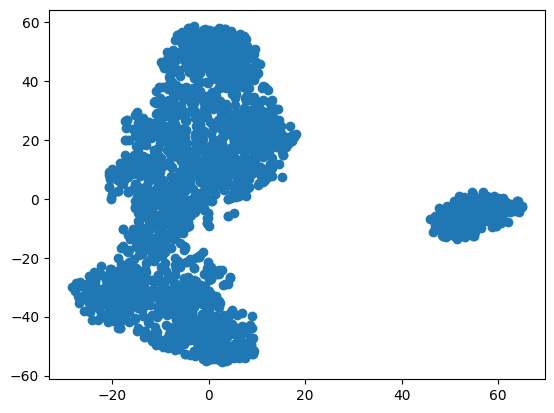

In [4]:
# 1.2 remplacer les valeurs NaN par 0 puis Exécuter une transformation T_SNE sur les données

import sklearn.manifold as sl
import matplotlib.pyplot as plt

tsne = sl.TSNE(n_components=2, perplexity=35, learning_rate=200)

competences_tsne = tsne.fit_transform(df_competences)

plt.scatter(competences_tsne[:, 0], competences_tsne[:, 1])
plt.show()

In [5]:
#1.3 Créer des filtres booléens par type de poste, puis sur les meilleurs joueurs (Overall au-dessus de 90)

attaquants=['CF', 'ST', 'LW', 'LF', 'RF','RW','RS','LS']
milieux=['LM','CAM','CDM','CM','RM','RCM','RDM','LCM','LDM','RAM']
defenseurs=['LWB','LB','CB','RB','RWB','LCB','RCB']
gardiens=['GK']

def pos2(player_positions):
    if player_positions in attaquants:
        return 'Attaquant'
    elif player_positions in milieux:
        return 'Milieu'
    elif player_positions in defenseurs:
        return 'Defenseur'
    elif player_positions in gardiens:
        return 'Gardien'
    else:
        return 'Remplaçant'
df["Position2"]=df["club_position"].apply(lambda x: pos2(x))
df["Position2"].value_counts()

best_players_per_position=df.iloc[df.groupby(df['Position2'])['overall'].idxmax()][['Position2','short_name','overall']]
best_players_per_position

,Position2,short_name,overall
0,Attaquant,L. Messi,93
15,Defenseur,V. van Dijk,89
5,Gardien,J. Oblak,91
4,Milieu,K. De Bruyne,91
26,Remplaçant,K. Navas,88


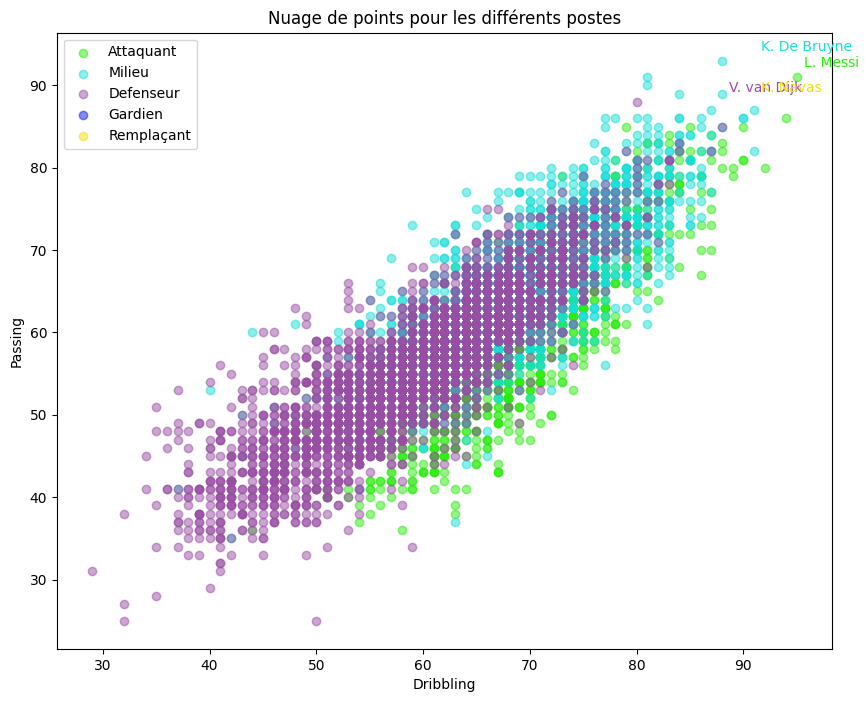

In [13]:
colors = {'Attaquant': '#2beb0e', 'Milieu': '#16ded7', 'Defenseur': '#984ea3', 'Gardien': '#0918e6', 'Remplaçant': '#f0e002'}

#1.4 Créer 4 nuages de points correspondant aux attaquants, milieux, défenseurs et gradient.
#1.5 Ajouter les noms des meilleurs joueurs

attaquants_df = df[df["Position2"] == "Attaquant"]
milieux_df = df[df["Position2"] == "Milieu"]
defenseurs_df = df[df["Position2"] == "Defenseur"]
gardiens_df = df[df["Position2"] == "Gardien"]

fig, ax = plt.subplots(figsize=(10,8))

for position, color in colors.items():
    x = df[df['Position2'] == position]['dribbling']
    y = df[df['Position2'] == position]['passing']

    if position == "Attaquant":
        df_pos = attaquants_df
    elif position == "Milieu":
        df_pos = milieux_df
    elif position == "Defenseur":
        df_pos = defenseurs_df
    elif position == "Gardien":
        df_pos = gardiens_df

    # Ajout des meilleurs joueurs
    best_player = best_players_per_position[best_players_per_position['Position2'] == position]['short_name'].values[0]
    ax.annotate(best_player, (x.max(), y.max()), color=colors[position],  xytext=(5,5), textcoords='offset points', fontsize=10, ha='left', va='bottom')

    ax.scatter(df_pos['dribbling'], df_pos['passing'], c=color, label=position, alpha=0.5)

ax.legend()
ax.set_xlabel('Dribbling')
ax.set_ylabel('Passing')
ax.set_title('Nuage de points pour les différents postes')

plt.show()

In [37]:
n_kmean=18000

# Suppression des gardiens de but

df_kmean=df.loc[:n_kmean]
df_kmean=df_kmean[(df_kmean["Position2"]!='GK')&(df_kmean['overall']>69)]

competences_ratings = ['pace','shooting','passing','dribbling','defending','physic','attacking_crossing','attacking_finishing',
                       'attacking_heading_accuracy','attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve',
                       'skill_fk_accuracy','skill_long_passing','skill_ball_control','movement_acceleration','movement_sprint_speed',
                       'movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping','power_stamina',
                       'power_strength','power_long_shots','mentality_aggression','mentality_interceptions','mentality_positioning',
                       'mentality_vision','mentality_penalties','mentality_composure','defending_marking_awareness','defending_standing_tackle',
                       'defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning',
                       'goalkeeping_reflexes','goalkeeping_speed']
# Création d'un joueur parfait pour savoir où il se situe

JoueurParfaitDict={'Name':'MrParfait','Overall':99}
for competence in competences_ratings:
    JoueurParfaitDict[competence]=99

df_kmean=df_kmean.append(JoueurParfaitDict,ignore_index=True)

df_competences=df_kmean[competences_ratings].fillna(0)
X=df_competences
X

      sofifa_id                                         player_url  \
0      158023.0  https://sofifa.com/player/158023/lionel-messi/...   
1      188545.0  https://sofifa.com/player/188545/robert-lewand...   
2       20801.0  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3      190871.0  https://sofifa.com/player/190871/neymar-da-sil...   
4      192985.0  https://sofifa.com/player/192985/kevin-de-bruy...   
...         ...                                                ...   
5461   262430.0  https://sofifa.com/player/262430/francisco-rib...   
5462   262435.0  https://sofifa.com/player/262435/thales-bento-...   
5463   263377.0  https://sofifa.com/player/263377/liel-abada/22...   
5464   264335.0  https://sofifa.com/player/264335/daniel-samek/...   
5465        NaN                                                NaN   

             short_name                            long_name player_positions  \
0              L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF 

/tmp/ipykernel_6502/101702326.py:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,0.0
1,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,0.0
2,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,0.0
3,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,0.0
4,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5461,77.0,67.0,64.0,73.0,33.0,52.0,67,65,61,64,73,76,70,50,57,72,78,76,67,68,83,68,48,70,47,68,45,30,64,67,65,68,28,32,26,8,11,15,6,5,0.0
5462,59.0,41.0,64.0,61.0,72.0,57.0,70,31,59,70,30,60,62,42,62,64,64,55,53,62,69,50,62,61,52,54,64,70,58,56,44,59,75,73,74,13,5,14,11,8,0.0
5463,77.0,66.0,63.0,75.0,34.0,56.0,65,67,39,66,58,74,64,42,58,72,78,77,90,64,91,71,55,70,58,66,34,22,64,66,52,67,39,34,35,7,12,10,8,13,0.0
5464,66.0,64.0,73.0,71.0,54.0,69.0,70,66,59,75,61,73,66,66,72,70,69,63,68,70,70,63,51,75,70,64,61,62,66,75,59,71,54,49,43,12,12,14,6,9,0.0


In [21]:
#2.1 Créer une division en 5 clusters des joueurs

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)

kmeans.fit(X)
labels = kmeans.labels_

df_kmean['cluster'] = labels


/home/gabgab/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [30]:
#2.2 Appliquer une PCA à 2 dimensions sur les joueurs

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_projected = pca.fit_transform(X)

df_pca = pd.DataFrame(data=X_projected, columns=['PC1', 'PC2'])

df_pca['cluster'] = kmeans.labels_

print(df_pca.head())

          PC1         PC2  cluster
0  -98.161805 -112.180870        3
1  -91.669310  -77.060215        3
2  -89.985780 -101.089663        3
3  -90.998461  -98.327838        3
4 -110.790448  -36.198053        1


In [38]:
#2.3 Afficher les clusters en couleurs sur la représentation PCA en 2D des joueurs.
# Ajouter un label pour les meilleurs joueurs (Overall au-dessus de 90)

filtre_meilleurs = df_kmean["overall"]>90
kmeans_clusters=go.Scatter(x=X_projected[:,0],y=X_projected[:,1],mode='markers',
                           marker=dict(
                               size=5,
                               color=clusters,
                               colorscale='Portland',
                               showscale=False
                           ))

acp_meilleurs=go.Scatter(
    x=X_projected[filtre_meilleurs,0],
    y=X_projected[filtre_meilleurs,1],name='Meilleurs joueurs',
    text=df_kmean.loc[filtre_meilleurs,'Name'],
    textfont=dict(family='sans serif',color='white',size=16),
    opacity=0.9,
    mode='markers',
    marker=dict(
        size=8,
        color='black',
        line=dict(
            color='white',
            width=1
        )
    )
)

data= [kmeans_clusters,acp_meilleurs]

layout = go.Layout(title="ACP + Clustering ",titlefont=dict(size=40),
                   xaxis=dict(title='F1'),
                   yaxis=dict(title='F2'),
                   autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [ ]:
# 3. Qui va gagner la Ligue des champions ?
